In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
all_files = ["PBP/S%iPBP.csv"%(i) for i in range(1,25)]

df = pd.concat((pd.read_csv(f) for f in all_files)).reset_index()

TDs = df.iloc[df[df['play'].str.contains("TOUCHDOWN")].index - 1]
picksix = TDs[TDs['play'].str.contains('INTERCEPTION')]
QBlist = pd.DataFrame(picksix['play'].str.replace("Pass by ","").str.replace(r" \(.*?\)","").str.replace(r"\(.*?\) ","").str.split(', to').str[0])
picksix['QB'] = QBlist
QBlist['play'].value_counts().to_csv('PickSix_S24.csv')

/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
QBlist['play'].value_counts()

Christ, J.         20
Maximus III, B.    19
McDummy, W.        19
Boss, M.           18
Orosz, C.          15
Akselsen, M.       14
Bigsby, C.         14
Applehort, R.      14
Pierno, N.         14
Francisco, S.      14
Jenkins, R.        13
Cole, E.           13
Falconi, A.        13
Showbiz, G.        13
McCormick, M.      13
Armstrong, F.      11
Reese, A.          11
Bronko, K.         11
Havran, C.         10
Fitzpatrick, K.    10
Hunt, E.           10
Kyubee, S.         10
Pennington, B.     10
Wright, D.          9
Blocksdale, A.      9
Bercovici, J.       9
Noble, L.           8
Rove, C.            8
Gambino, C.         8
Fujiwara, C.        7
Cue, J.             7
Oles, T.            5
Phoenix, B.         4
Banks II, D.        4
Stone, W.           3
Jack, C.            3
Draxel, V.          2
O'Donnell, G.       1
Holder, P.          1
Jack, ".            1
Jack, M.            1
LaFleur, F.         1
Name: play, dtype: int64

Note: the last row (`Jack, ".`) is Monty Jack.

In [3]:
picksix[picksix.play.str.contains("Jack")]

,index,Unnamed: 0,teamID,Q,time,totTime,down,distance,side,yard,play,gameID,S,homeTeam,awayTeam,teamPoss,dist2goal,awayScore,homeScore,QB
30441,9077,3,6,1,14:50,3590,1.0,10.0,SJS,40.0,"Pass by Hunt, E., to Jackson, M.. INTERCEPTION...",318,3,BAL,SJS,SJS,60.0,0,0,"Hunt, E."
33254,11890,4,6,1,14:22,3562,3.0,5.0,SJS,31.0,"Pass by Hunt, E., to Jackson, M.. INTERCEPTION...",331,3,COL,SJS,SJS,69.0,0,0,"Hunt, E."
33311,11947,61,6,2,12:35,2555,3.0,7.0,SJS,23.0,"Pass by Hunt, E., to Jackson, M.. INTERCEPTION...",331,3,COL,SJS,SJS,77.0,0,14,"Hunt, E."
221774,4041,101,8,2,5:28,2128,2.0,9.0,NO,50.0,"Pass by Francisco, S., to Jackson, A.. INTERCE...",4576,18,NO,COL,NO,50.0,17,10,"Francisco, S."
225964,8231,148,8,3,8:06,1386,1.0,10.0,NO,37.0,"Pass by Francisco, S., to Jackson, A.. INTERCE...",4596,18,AUS,NO,NO,63.0,21,13,"Francisco, S."
253527,5761,74,6,2,6:13,2173,1.0,10.0,SJS,23.0,"Pass by Wright, D., to Jackson, A.. INTERCEPTI...",4998,20,AUS,SJS,SJS,77.0,10,21,"Wright, D."
255746,7980,25,6,1,8:43,3223,2.0,6.0,SJS,35.0,"Pass by Wright, D., to Jackson, A.. INTERCEPTI...",5009,20,SJS,OCO,SJS,65.0,2,0,"Wright, D."
261149,13383,51,6,1,1:13,2773,1.0,10.0,SJS,20.0,"Pass by Wright, D., to Jackson, A.. INTERCEPTI...",5034,20,SJS,YKW,SJS,80.0,7,7,"Wright, D."
314033,18375,171,6,4,10:54,654,1.0,10.0,SJS,17.0,"Pass by Jack (R), ""., to Lackson (R), J.. INTE...",5684,23,SJS,OCO,SJS,83.0,37,6,"Jack, ""."
314487,18829,4,2,1,14:14,3554,3.0,16.0,YKW,9.0,"Pass by Bigsby, C., to Jackson, A.. INTERCEPTI...",5687,23,PHI,YKW,YKW,91.0,0,0,"Bigsby, C."


Also note that Joliet and Jameis Christ are combined. Joliet did not start playing until S11.

In [4]:
picksix[picksix.play.str.contains("Christ, J.")]

,index,Unnamed: 0,teamID,Q,time,totTime,down,distance,side,yard,play,gameID,S,homeTeam,awayTeam,teamPoss,dist2goal,awayScore,homeScore,QB
2536,2536,163,6,4,9:26,566,1.0,10.0,SJS,7.0,"Pass by Christ, J., to Bottles, B.. INTERCEPTI...",23,1,BAL,SJS,SJS,93.0,17,20,"Christ, J."
3369,3369,5,6,1,13:40,3520,3.0,16.0,SJS,9.0,"Pass by Christ, J., to Cook, B.. INTERCEPTION ...",34,1,ARI,SJS,SJS,91.0,0,0,"Christ, J."
3540,3540,176,6,4,8:15,495,3.0,6.0,SJS,49.0,"Pass by Christ, J., to Weston, S.. INTERCEPTIO...",34,1,ARI,SJS,SJS,51.0,3,16,"Christ, J."
4688,4688,101,6,3,12:20,1640,2.0,10.0,OCO,37.0,"Pass by Christ, J., to Cook, B.. INTERCEPTION ...",13,1,OCO,SJS,SJS,37.0,0,14,"Christ, J."
9581,561,169,7,4,11:50,710,1.0,10.0,PHI,30.0,"Pass by Christ, J., to Kroetch, D.. INTERCEPTI...",113,2,SJS,PHI,PHI,70.0,16,24,"Christ, J."
18889,9869,87,7,2,5:25,2125,3.0,21.0,PHI,36.0,"Pass by Christ, J., to Newman, M.. INTERCEPTIO...",74,2,COL,PHI,PHI,64.0,14,10,"Christ, J."
124971,567,154,6,3,0:09,909,2.0,3.0,SJS,27.0,"Pass by (R) Christ, J., to Oles, K.. INTERCEPT...",2673,11,OCO,SJS,SJS,73.0,7,6,"Christ, J."
126471,2067,98,6,2,2:18,1938,3.0,11.0,SJS,37.0,"Pass by (R) Christ, J., to Weston, S.. INTERCE...",2680,11,COL,SJS,SJS,63.0,7,13,"Christ, J."
126517,2113,144,6,3,4:08,1148,2.0,6.0,SJS,26.0,"Pass by (R) Christ, J., to Flash, X.. INTERCEP...",2680,11,COL,SJS,SJS,74.0,7,27,"Christ, J."
131055,6651,36,6,1,5:14,3014,1.0,10.0,SJS,20.0,"Pass by (R) Christ, J., to Flash, X.. INTERCEP...",2701,11,SJS,OCO,SJS,80.0,7,7,"Christ, J."


***

## Distance to goal

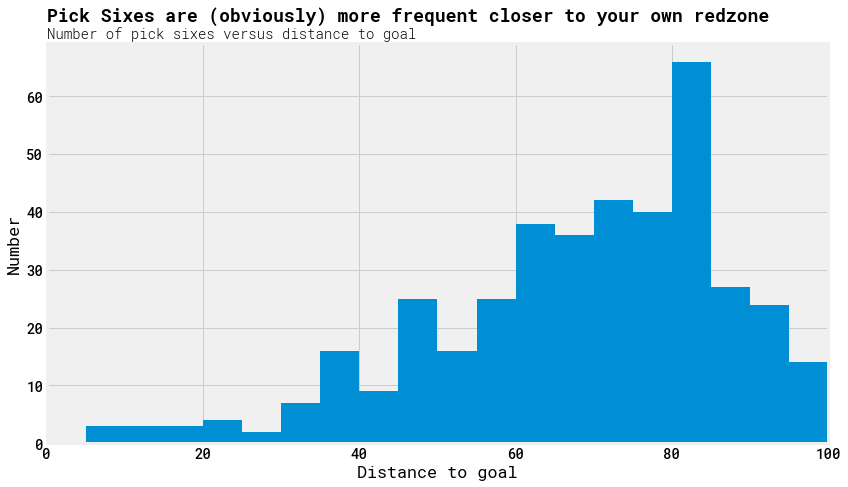

In [117]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xlim(0,100)

plt.text(0,73,'Pick Sixes are (obviously) more frequent closer to your own redzone',weight='bold',size=18)
plt.text(0,70,'Number of pick sixes versus distance to goal',weight='light')
plt.xlabel('Distance to goal')
plt.ylabel('Number')

plt.hist(picksix['dist2goal'],bins=np.arange(0,110,5))

plt.tight_layout()
plt.savefig('picksix/dist.png',facecolor=fig.get_facecolor())
plt.show()

In [78]:
picksix.groupby("QB").min()[['dist2goal']].sort_values('dist2goal').head(10)

,dist2goal
QB,
"Applehort, R.",6.0
"Phoenix, B.",6.0
"Akselsen, M.",8.0
"Showbiz, G.",12.0
"Jack, C.",13.0
"Bigsby, C.",13.0
"Fitzpatrick, K.",15.0
"Gambino, C.",18.0
"Havran, C.",23.0


In [79]:
picksix.groupby("QB").max()[['dist2goal']].sort_values('dist2goal',ascending=False).head(10)

,dist2goal
QB,
"Maximus III, B.",99.0
"Cue, J.",99.0
"Bronko, K.",99.0
"Bercovici, J.",98.0
"Jenkins, R.",98.0
"Boss, M.",97.0
"Oles, T.",97.0
"Akselsen, M.",97.0
"Noble, L.",96.0


## Distance to goal

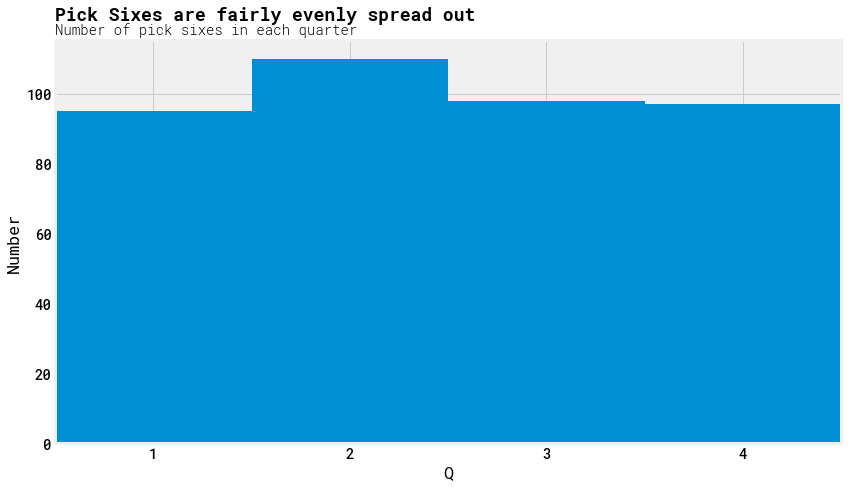

In [123]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,7),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xlim(0.5,4.5)
plt.xticks([1,2,3,4])

plt.text(0.5,121,'Pick Sixes are fairly evenly spread out',weight='bold',size=18)
plt.text(0.5,117,'Number of pick sixes in each quarter',weight='light')
plt.xlabel('Q')
plt.ylabel('Number')

plt.hist(picksix['Q'],bins=np.arange(1,7,1),align='left')

plt.tight_layout()
plt.savefig('picksix/q.png',facecolor=fig.get_facecolor())
plt.show()

In [102]:
picksix.groupby("QB").min()[['totTime']].sort_values('totTime').head(5)

,totTime
QB,
"Fitzpatrick, K.",24
"Fujiwara, C.",31
"Bercovici, J.",47
"Boss, M.",47
"Pennington, B.",51


In [105]:
picksix[picksix.play.str.contains("Fujiwara")].sort_values('totTime').head(1)

,index,Unnamed: 0,teamID,Q,time,totTime,down,distance,side,yard,play,gameID,S,homeTeam,awayTeam,teamPoss,dist2goal,awayScore,homeScore,QB
322129,5168,185,1,4,0:31,31,1.0,10.0,BAL,27.0,"Pass by Fujiwara, C., to Kaepercolin, N.. INTE...",6156,24,YKW,BAL,BAL,73.0,21,24,"Fujiwara, C."
